<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Proyecto_UL

**SEGMENTACIÓN DE USUARIOS PARA MEJORA DE EXPERIENCIA EN SITIOS WEB DE COMERCIO ELECTRÓNICO**


#### **Contexto del proyecto**

El comercio electrónico se ha vuelto esencial para las empresas en la era de internet y la globalización, pero comprender y mejorar la retención de clientes en las páginas web es un desafío complejo. Este proyecto busca construir un modelo de clustering no supervisado para segmentar a los usuarios en grupos basados en su comportamiento en el sitio web. El objetivo no es predecir ventas, sino identificar los factores que llevan a los usuarios a abandonar el proceso de compra. Se utilizarán modelos como DBSCAN, K-medias y K-medoides para agrupar a los usuarios y analizar dónde se detienen en el embudo de conversión. Estos grupos servirán como insumo para optimizar estrategias de marketing y retención de clientes, permitiendo a los especialistas del comercio electrónico identificar características clave. Aunque se considera DBSCAN debido a sus ventajas, se realizarán comparaciones con otros métodos de clustering para tomar una decisión informada. El proyecto busca responder a la pregunta de cómo identificar los factores principales que afectan el abandono de usuarios en el proceso de compra y, así, mejorar las estrategias de mercadeo y retención.


# Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `online_shoppers_intention.csv` cargue estos datos en su *cuaderno*.

In [1]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
!pip install kneed
from kneed import KneeLocator

#Cargamos los datos
df = pd.read_csv('data/online_shoppers_intention.csv', sep=',')
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
# Ver datos unicos de la columna Month
df['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [3]:
# Reemplazamos nuestras variables dummies con 0 y 1
df.Weekend = df.Weekend.replace({True: 1, False: 0})
df.Revenue = df.Revenue.replace({True: 1, False: 0})

df.Month = df.Month.replace({'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12})

df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,0,0


In [4]:
# Tenemos variables categoricas, por lo cual debemos crear la dummies correspondientes
cat_cols = ['VisitorType']
dummies = pd.get_dummies(df[cat_cols], prefix=cat_cols)

# Concatenamos los datos originales con las variables ficticias
df_con_dummies = pd.concat([df, dummies], axis=1)

# Eliminamos las variables originales ya que ahora tenemos las variables ficticias
df_con_dummies = df_con_dummies.drop(cat_cols, axis=1)

# Imprimimos el dataframe con las variables ficticias
df_con_dummies.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [5]:
# Validamos que no se tengan valores nulos
nulos = df.isnull().sum()
print('Cantidad de nulos en la data:',nulos.sum())

Cantidad de nulos en la data: 0


In [6]:
#Obtenemos el tamaño de los datos
df.shape

(12330, 18)

Importamos pandas y cargamos los datos del csv. Usamos la funcion head para tener una primera visualizacion de los datos cargados

###**Descripción de los datos**

Se van a utilizar los datos “Online Shoppers Purchasing Intention Dataset” [https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset]. Estos están compuestos por 12.330 registros y 18 variables. Las variables son las siguientes:

Administrative: Indica el número de páginas de la categoría Administrativa visitadas en la sesión.

Administrative_Duration: Indica la duración en segundos en páginas Administrativas durante la sesión.

Informational: Indica el número de páginas de la categoría Informativa visitadas en la sesión.

Informational_Duration: Indica la duración en segundos en páginas informativas durante la sesión.

ProductRelated: Indica el número de páginas de la categoría Productos visitadas en la sesión.

ProductRelated_Duration: Indica la duración en segundos en páginas de productos durante la sesión.

BounceRates: Métrica construida por Google Analytics, indica la tasa de rebote de la página visitada (rebote se refiere a que la persona sale de la sesión visitando sólo una página).

ExitRates: Métrica construida por Google Analytics, indica la tasa de salida de la última página visitada.

PageValues: Métrica construida por Google Analytics, indica el valor promedio de la última página visitada (Para que una página tenga valor, se debió presentar una compra alguna sesión).

SpecialDay: Indica que tan cerca estaba la visita con respecto a alguna fecha festiva. 1 indica que la visita fue hecha el mismo día de la festividad, 0 si no se encuentra cerca.

Month: Mes de la visita.

OperatingSystems: Id del sistema operativo.

Browser: Id del browser usado.

Region: Id de la región del usuario realizando la visita.

TrafficType: Tipo de tráfico.

Visitor_Type: Returning en caso de usuario recurrente, new en caso de usuario nuevo.

Weekend: Indica si la visita fue durante un fin de semana.

Revenue: Indica si se realizó alguna compra durante la visita en cuestión.


### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo utilizamos de estadísticas descriptivas y matrices de correlación.

In [7]:
# Creamos un data frame con estadísticas descriptivas para cada columna
df_descriptive_stats = df_con_dummies.describe()

# mostramos el data frame
df_descriptive_stats

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


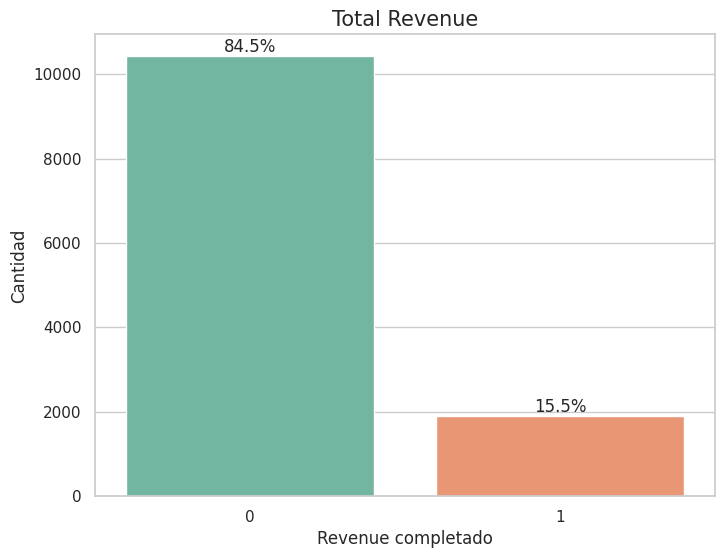

In [8]:
# Continuamos revisando la cantidad de visitas online que fueron efectivas

# Creamos el plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Revenue', palette='Set2')

# Organizamos el titulo y el nombre del eje x y y
plt.title('Total Revenue', fontsize=15)
plt.xlabel('Revenue completado', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Añadimos los % de las visitas efectivas
total_count = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.show()


En la grafica podemos ver que en el total de visitas, el 84% no termino en compra mientras que el 16% si fue efectivo.

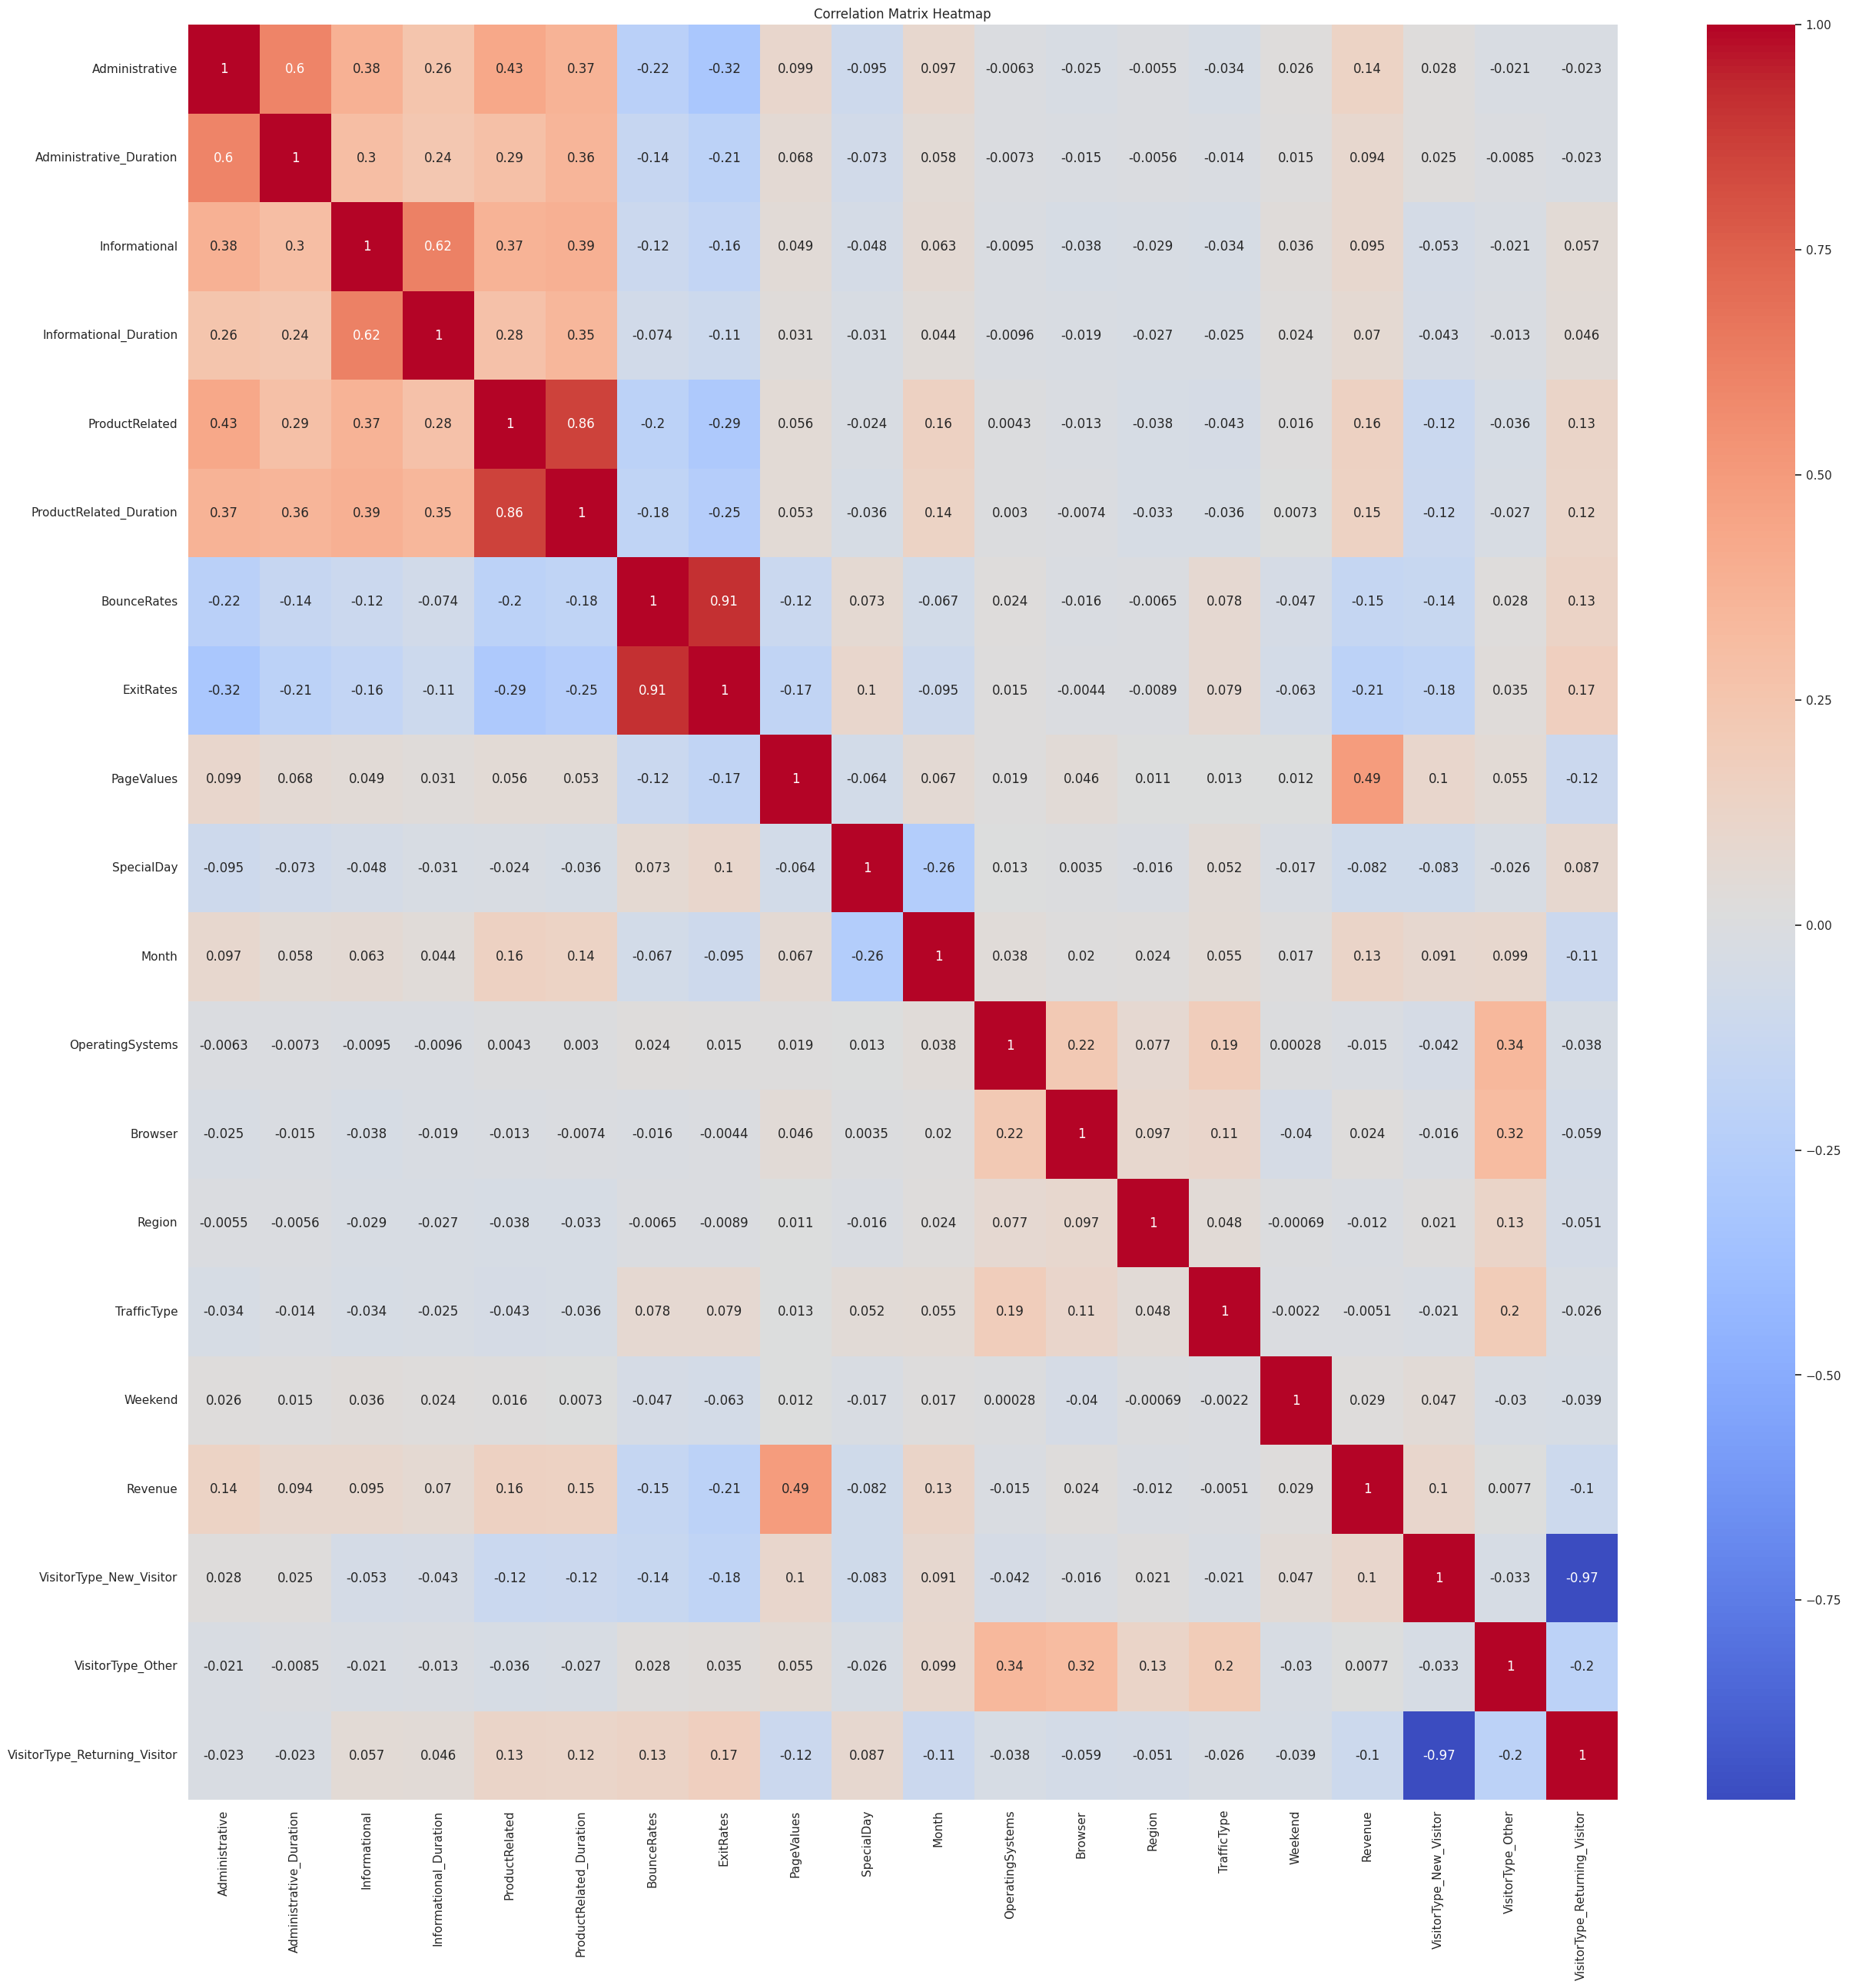

In [9]:
# Variables numericas
val_num = df_con_dummies.select_dtypes(include=["number"])

# Calculamos la matriz de correlacion
correlation_matrix = val_num.corr()
correlation_matrix

# Creamos un mapa de calor
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-10-690dc1ddeb26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()['Revenue']


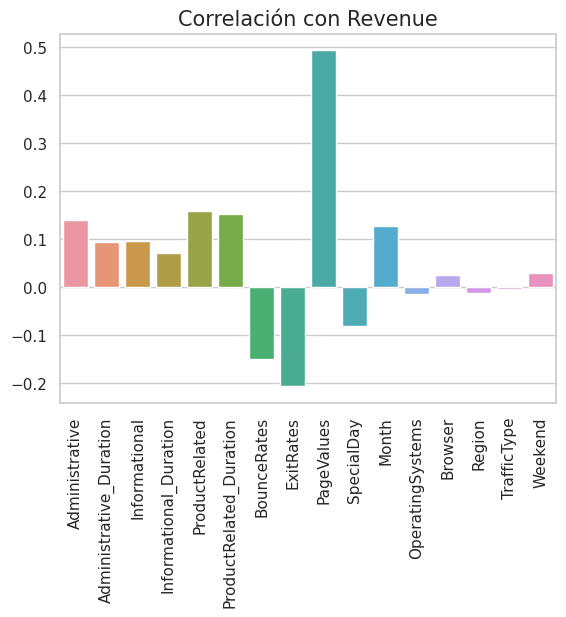

In [10]:
# Realizamos la correlación de cada una de las variables con respecto a revenue

corr = df.corr()['Revenue']
# Lo graficamos
sns.barplot(x=corr[0:-1].index, y=corr[0:-1].values)
plt.title('Correlación con Revenue', fontsize=15)
plt.xticks(rotation=90)
plt.show()


Vemos que la correlación más fuerte de Revenue es con PageValues

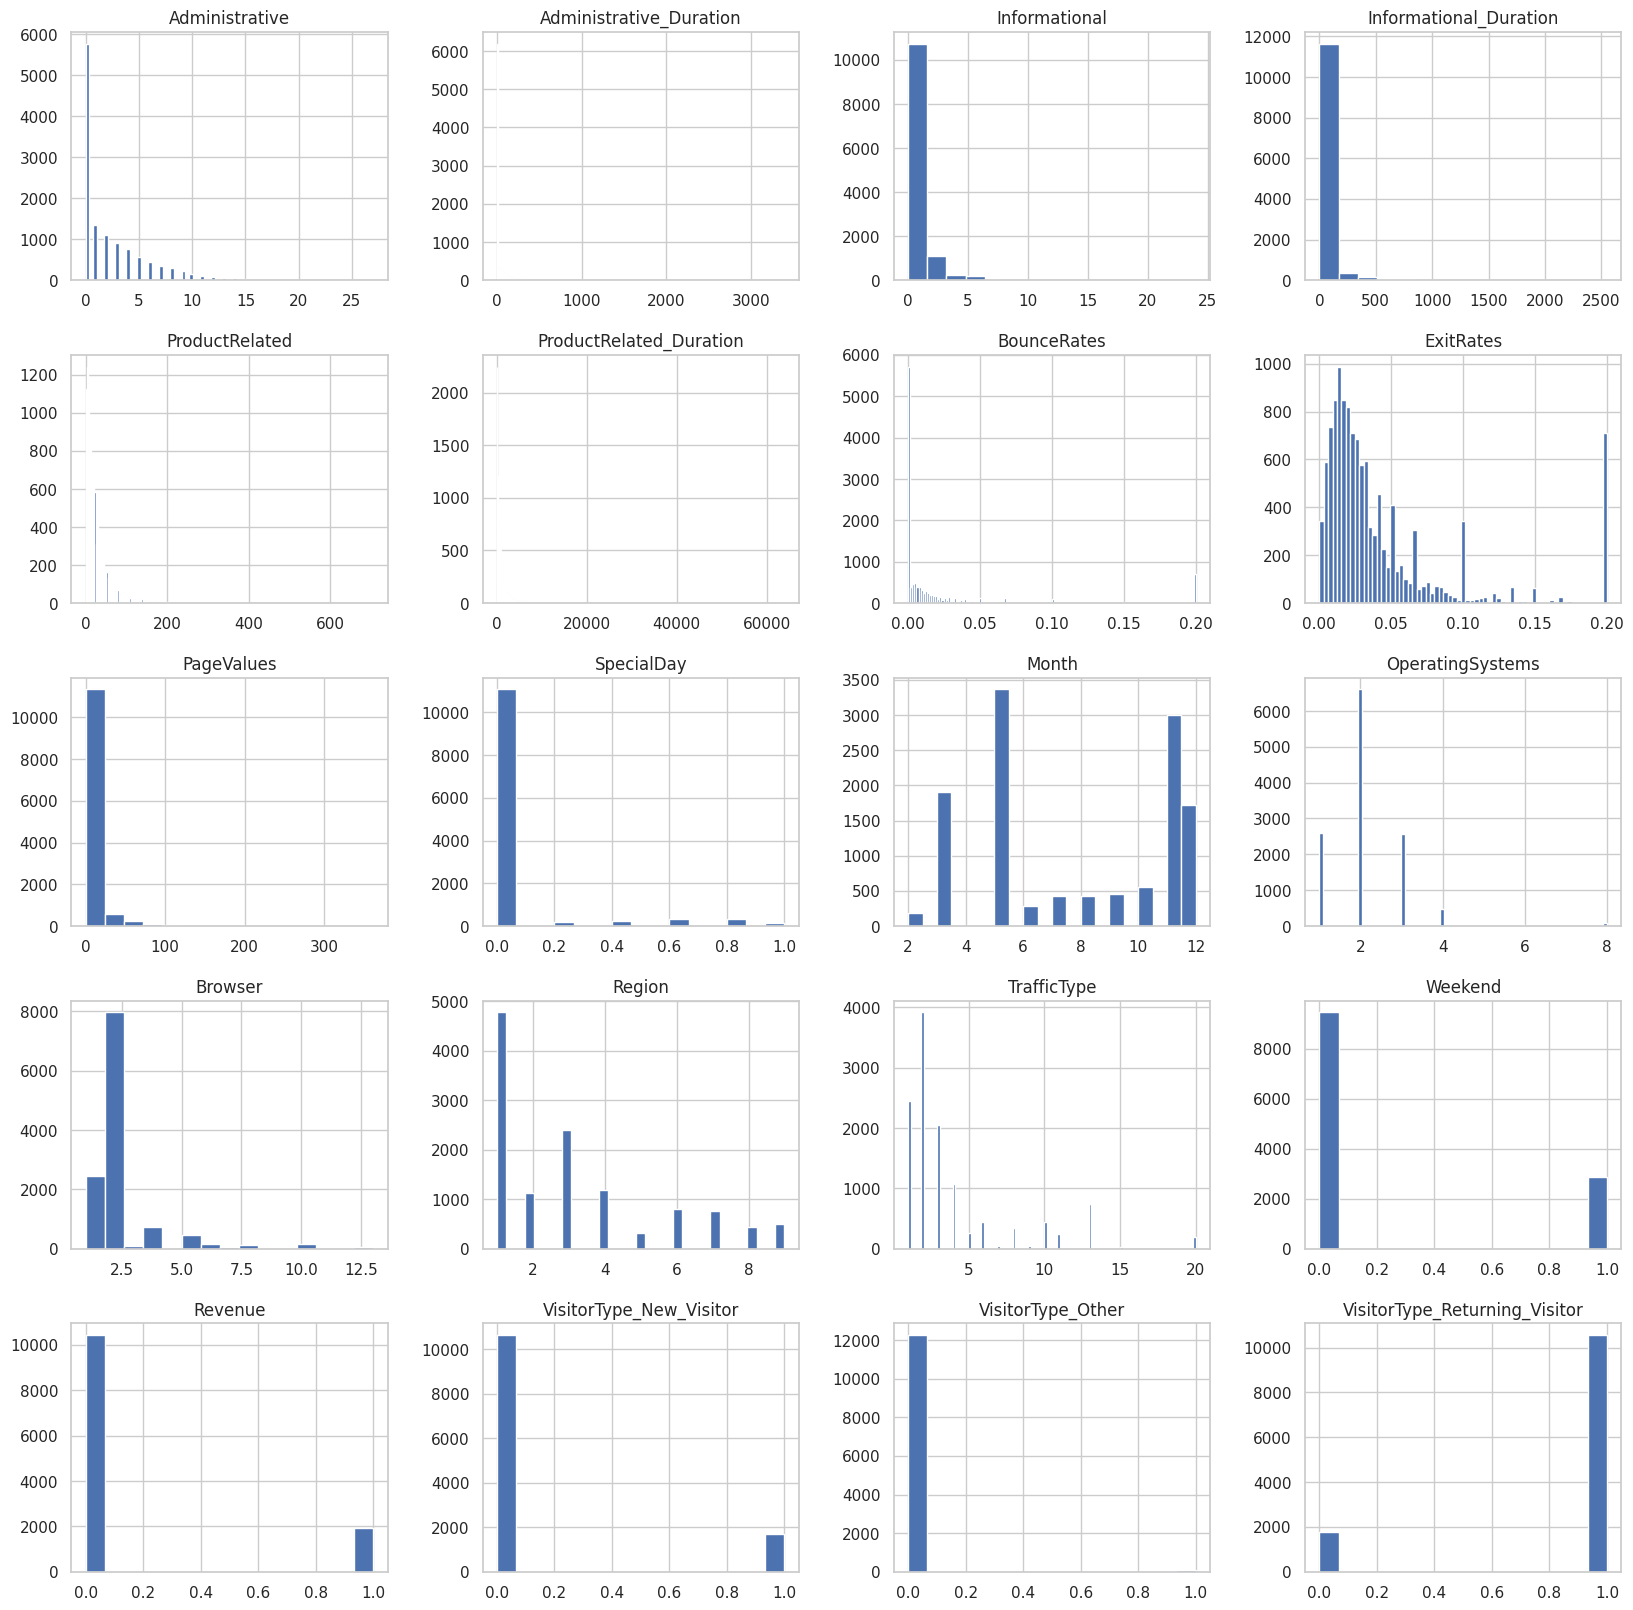

In [11]:
# Construimos el histograma
hist = val_num.hist(bins = 'auto', figsize=(20,20))

##### Pasos
- Se realiza la importación de los datos
- Se verifican datos nulos
- Se convierten las variables categóricas a variables dummy
- Se crea un gráfico de la variable Revenue para ver cuantas de las visitas son efectivas
- Se obtuvieron las estadísticas descriptivas de todas las variables
- Se genera el gráfico de correlación
- Se genera histograma de la variable de interés

#### Procedimiento
Primero, realizamos un proceso de limpieza de datos en donde verificamos los valores nulos. Luego, transformamos las variables de Revenue y Weekend que originalmente tenían valores 'true' y 'false' en valores numéricos, asignando 1 y 0. Continuando, convertimos las variables de categóricas a variables dummies y obtuvimos las estadísticas descriptivas de cada una de las variables. En las estadísticas descriptivas podemos observar que por sesión los usuarios entran en promedio a 2 páginas administrativas, la mitad de ellos visitó por lo menos 18 páginas relacionadas a productos y las tasas máximas de rebote y salida que tenemos en alguna(s) pagina(s) es 20%.

#### Resumen Análisis Descriptivo
De acuerdo con los resultados, podemos observar que la distribución de los datos con respecto a las visitas realizadas en el sitio web y la duración en las diferentes secciones, así como también la concurrencia para los diferentes meses. Para la variable Exit Rate vemos que las personas que navegan por el sitio tienen tendencia a estar poco tiempo; para la variable Browser se ve la preferencia de uso de un navegador especifico para acceder al sitio, como también que una de las regiones tiene mayor concentración de datos.



# 3.  Definición de Modelo

Utilizaremos diferentes modelos de aprendizaje no supervisado, que nos permitirá segmentar los usuarios de acuerdo con su comportamiento en el sitio web.

In [12]:
# Estandarizamos las variables
X = val_num.values

# Estandarizamos los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce la dimensionalidad a 2D utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [13]:
val_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


Realizamos la estandarización de variables para poder utilizarlas en los diferentes modelos

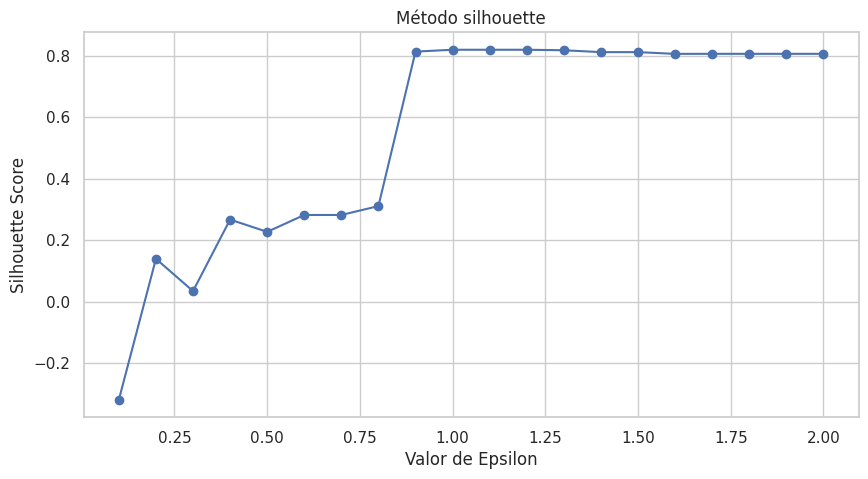

El valor óptimo de epsilon es: 0.9999999999999999


DBSCAN(eps=0.9999999999999999)

In [14]:
# Creamos una lista para almacenar los valores de la métrica
silhouette_scores = []

# Rango de valores de epsilon para DBSCAN
eps_values = np.linspace(0.1, 2.0, num=20)

# Iteramos sobre diferentes valores de epsilon
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(X_pca)
    labels = dbscan.labels_

    # Excluimos los puntos ruidosos (-1) de la evaluación de la métrica
    if len(np.unique(labels)) > 1:
        silhouette_scores.append(silhouette_score(X_pca, labels))

# Graficamos la métrica
plt.figure(figsize=(10, 5))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Método silhouette')
plt.xlabel('Valor de Epsilon')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Encuentra el valor óptimo de epsilon basado en la métrica del codo
optimal_eps = eps_values[np.argmax(silhouette_scores)]
print("El valor óptimo de epsilon es:", optimal_eps)

# Generamos el valor óptimo de epsilon para realizar el clustering final
dbscan_final = DBSCAN(eps=optimal_eps, min_samples=5)
dbscan_final.fit(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

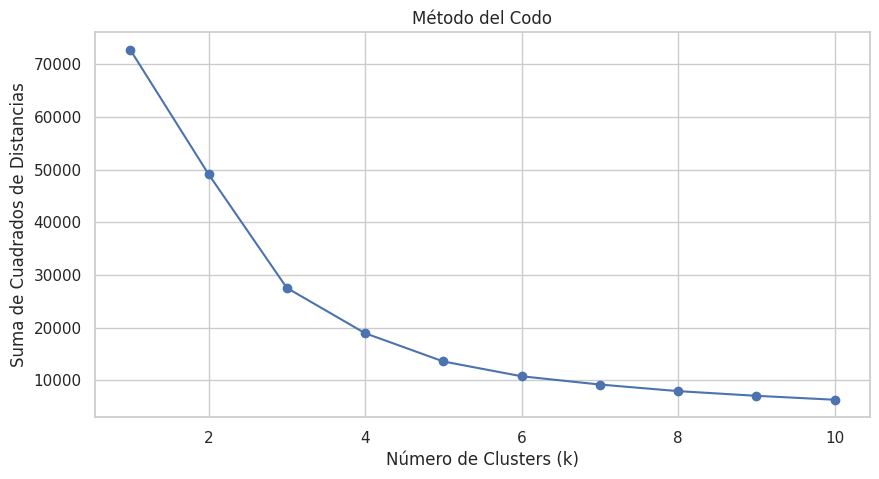

In [15]:
# Creamos una lista para almacenar los valores de la métrica del codo
elbow_scores = []

# Rango de valores de k (número de clusters)
k_values = range(1, 11)

# Iteramos sobre diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Calculamos la suma de los cuadrados de las distancias para cada punto al centroide
    elbow_scores.append(kmeans.inertia_)

# Graficamos la métrica del codo
plt.figure(figsize=(10, 5))
plt.plot(k_values, elbow_scores, marker='o', linestyle='-')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Cuadrados de Distancias')
plt.grid(True)
plt.show()


De acuerdo con los resultadoso obtenidos en el paso anterior, se identifica el valor preliminar para el número de clusters que en este caso serían "3" y el valor de epsilon "0.99"

## Clustering Jerárquico

Es un enfoque de agrupamiento que organiza los datos en una jerarquía de clusters.
Puede ser aglomerativo (comienza con puntos individuales y los fusiona en clusters más grandes) o divisivo (comienza con un cluster grande y lo divide en clusters más pequeños).
Proporciona una visión intuitiva de cómo los datos están organizados en diferentes niveles de granularidad.
Útil cuando no se conoce de antemano el número de clusters.

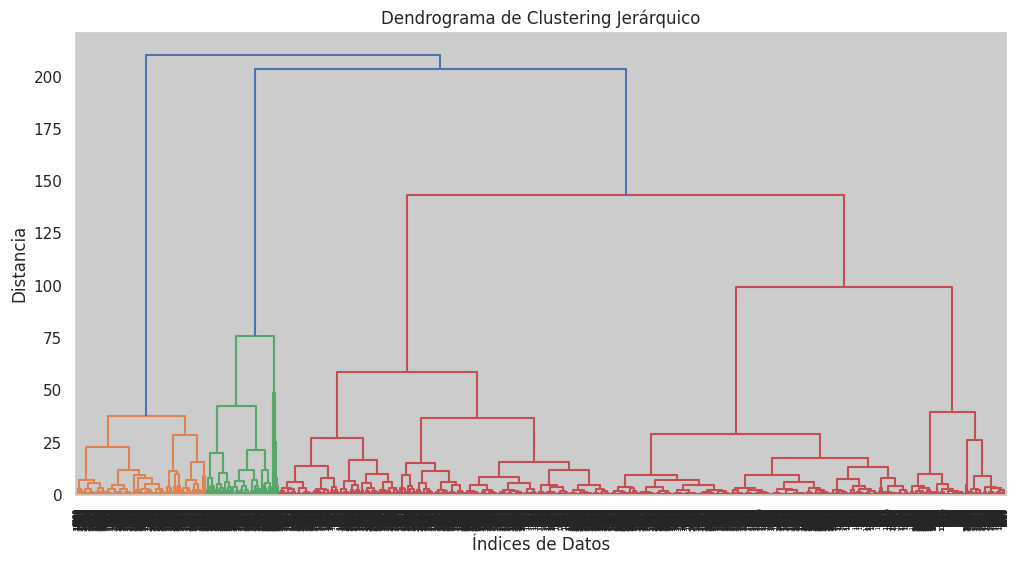

In [16]:
# Crear un modelo de clustering jerárquico
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Ajustar el modelo a los datos escalados
agg_clustering.fit(X_pca)

# Etiquetas de los clusters
labels = agg_clustering.labels_

# Visualizar los resultados utilizando un dendrograma
linkage_matrix = linkage(X_pca, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de Datos')
plt.ylabel('Distancia')
plt.show()

El dendrograma nos permite visualizar la clasificación de datos en clusters según el corte de distancia que se desee, esto es una aproximación de la cantidad de clusters que se podrían utilizar

## Kmeans

Asigna cada punto de datos al cluster más cercano según la distancia euclidiana.
Requiere especificar previamente el número de clusters (k).
Tiene una eficiencia computacional alta y es ampliamente utilizado.
Funciona bien cuando los clusters tienen formas globulares y tamaños similares.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


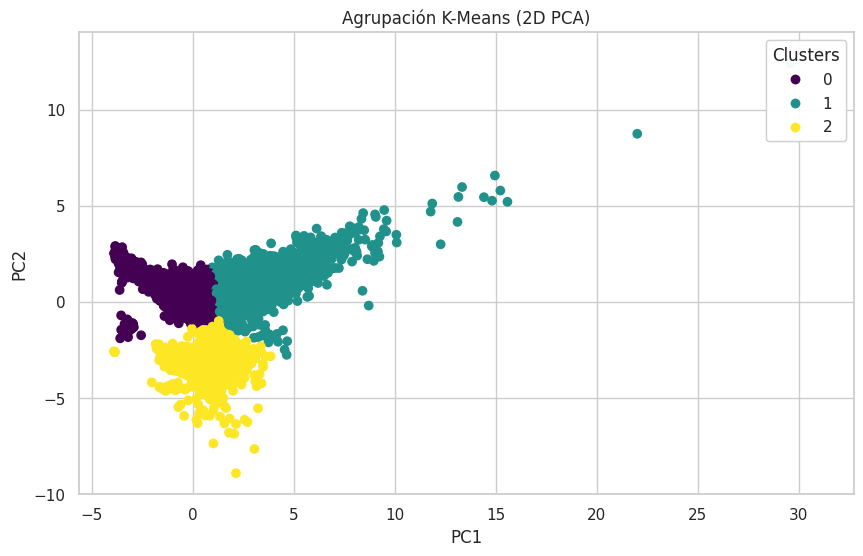

In [17]:
# Definimos el modelo
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
cluster_Kmeans = kmeans.labels_

# Visualiza los resultados en un scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_Kmeans, cmap='viridis')
plt.title('Agrupación K-Means (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Agrega una leyenda para los clusters
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

## Kmedoides

K-medoides es un método de clustering muy similar a K-medias puesto que ambos agrupan las observaciones en K clusters. Sin embargo, la diferencia principal radica en que K-medoides en vez de utilizar centroides, emplea medoides. Un medoide es un elemento del cluster cuya distancia promedio entre él y todos los demás elementos del cluster es la menor posible. Este elemento es el elemento más central del cluster y por lo tanto podemos considerarlo como el más representativo.

In [18]:
# Calcular la matriz de distancias
distances = pairwise_distances(X_pca, metric='euclidean')  # Puedes usar una métrica adecuada

# Luego, aplicar K-Medoids con la matriz de distancias
Kmedoides = KMedoids(n_clusters=3, metric='precomputed', random_state=42).fit(distances)

# Obtener los índices de los medoides
medoid_indices = Kmedoides.medoid_indices_
print("Índices de los medoides:", medoid_indices)

Índices de los medoides: [   45 12134  6152]


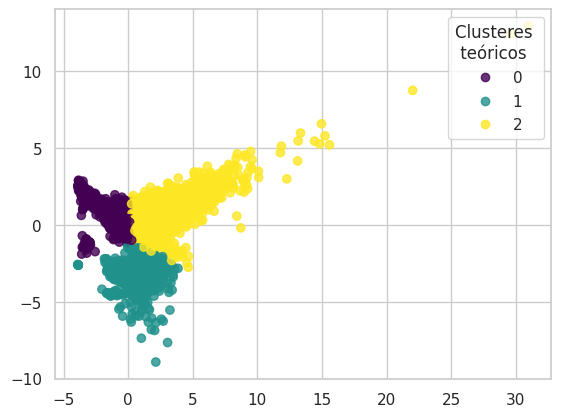

In [19]:
# Generamos la gráfica
fig, ax = plt.subplots()
g_puntos = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = Kmedoides.labels_, alpha = 0.8, cmap='viridis')
legend = ax.legend(*g_puntos.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
plt.show()

Al utilizar el modelo Kmedoides con 3 clusters, podemos observar distribución y clasificación para los grupos de interés

In [65]:
# Agrega las etiquetas de cluster al DataFrame original (si no lo has hecho ya)
df['Cluster'] = Kmedoides.labels_

# Calcula estadísticas descriptivas para cada cluster
cluster_stats = df.groupby('Cluster').describe()

# Transpone el resumen para que las estadísticas estén en filas y las variables en columnas
cluster_stats = cluster_stats.transpose()
datos_print = cluster_stats.loc[["ExitRates","BounceRates","Administrative_Duration"]]
datos_print

Cluster                                  0            1            2
ExitRates               count  6960.000000  1768.000000  3602.000000
                        mean      0.061133     0.018698     0.020140
                        std       0.057043     0.020205     0.012200
                        min       0.000000     0.000000     0.000000
                        25%       0.022222     0.006897     0.011753
                        50%       0.040000     0.013333     0.018076
                        75%       0.075000     0.024419     0.026029
                        max       0.200000     0.200000     0.106667
BounceRates             count  6960.000000  1768.000000  3602.000000
                        mean      0.035424     0.002541     0.006267
                        std       0.060679     0.013441     0.007989
                        min       0.000000     0.000000     0.000000
                        25%       0.000000     0.000000     0.000000
                        50%       0.008333     0.000000     0.003867
                        75%       0.034737     0.000000     0.008962
                        max       0.200000     0.200000     0.080838
Administrative_Duration count  6960.000000  1768.000000  3602.000000
                        mean     19.104505    87.079706   196.993112
                        std      49.004624   152.725908   264.628967
                        min       0.000000     0.000000     0.000000
                        25%       0.000000     0.000000    47.017857
                        50%       0.000000    46.400000   119.366667
                        75%      11.000000   110.500000   243.125000
                        max     844.000000  1946.000000  3398.750000

## DBSCAN

Identifica clusters basados en la densidad de puntos. Puede identificar automáticamente el número de clusters. Capaz de manejar clusters de formas y tamaños irregulares. Robusto a la presencia de ruido y valores atípicos.

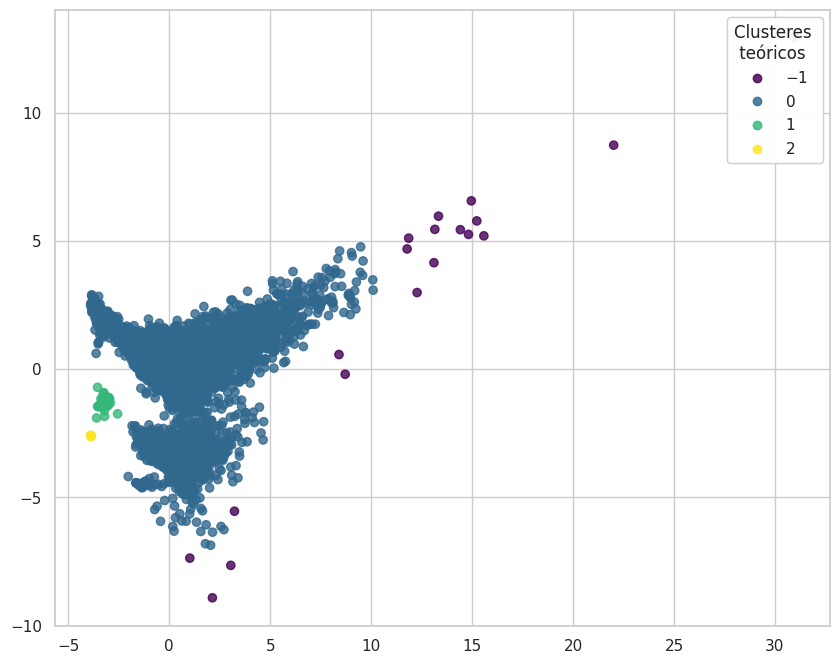

In [20]:
db = DBSCAN(eps=0.7, min_samples=4)
clusters=db.fit_predict(X_pca)

fig, ax = plt.subplots(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = clusters, alpha = 0.8, cmap='viridis')
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusteres \n teóricos")
ax.add_artist(legend)
plt.show()


<ipython-input-21-1019e3633958>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-21-1019e3633958>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-21-1019e3633958>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-21-1019e3633958>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-21-1019e3633958>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


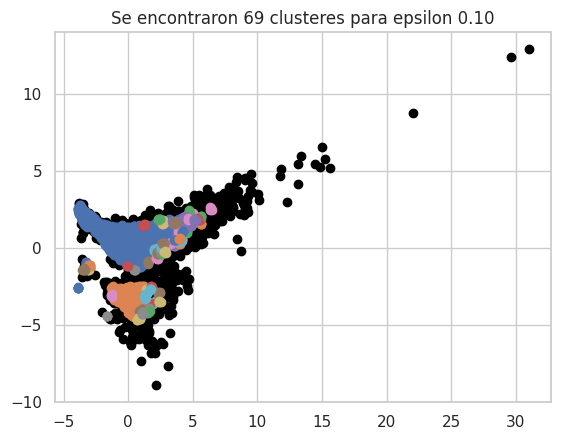

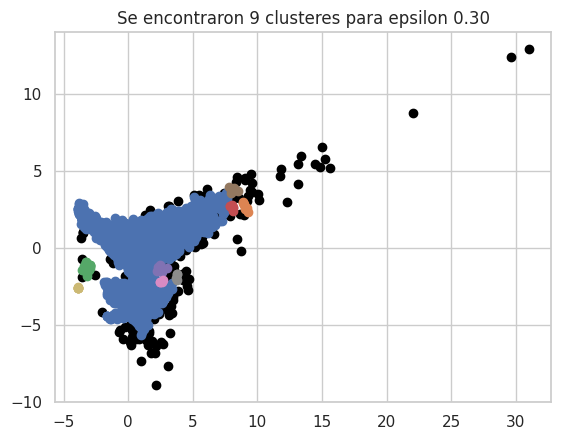

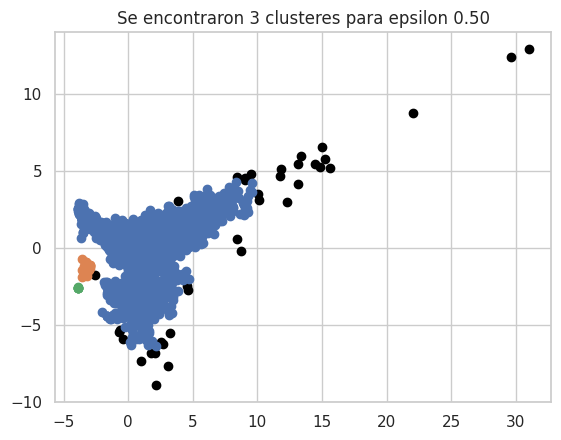

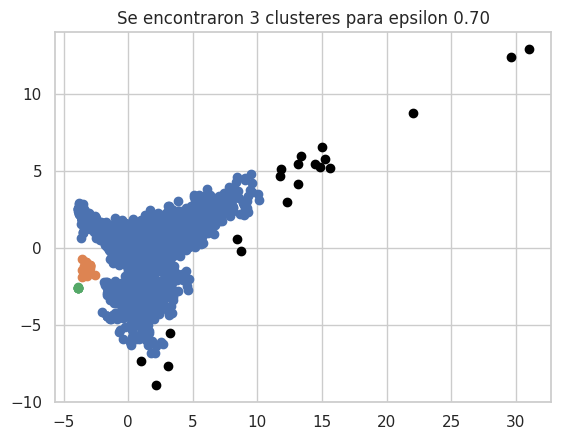

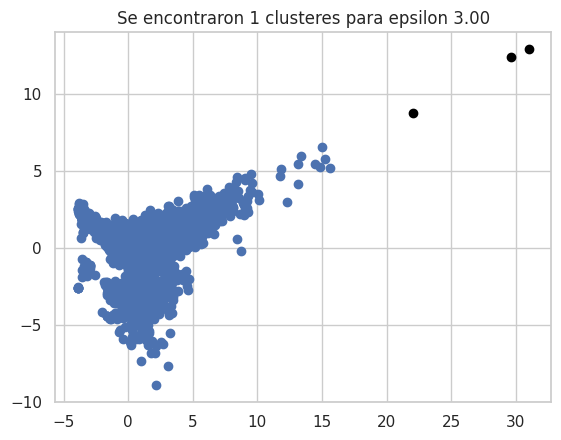

In [21]:
# Realizamos una validación de los valores para epsilon

for e in [0.1, 0.3, 0.5, 0.7, 3]:
    db = DBSCAN(eps = e, min_samples = 4).fit(X_pca)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X_pca).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1],
                cmap='viridis'
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black"
                )
    plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, e))


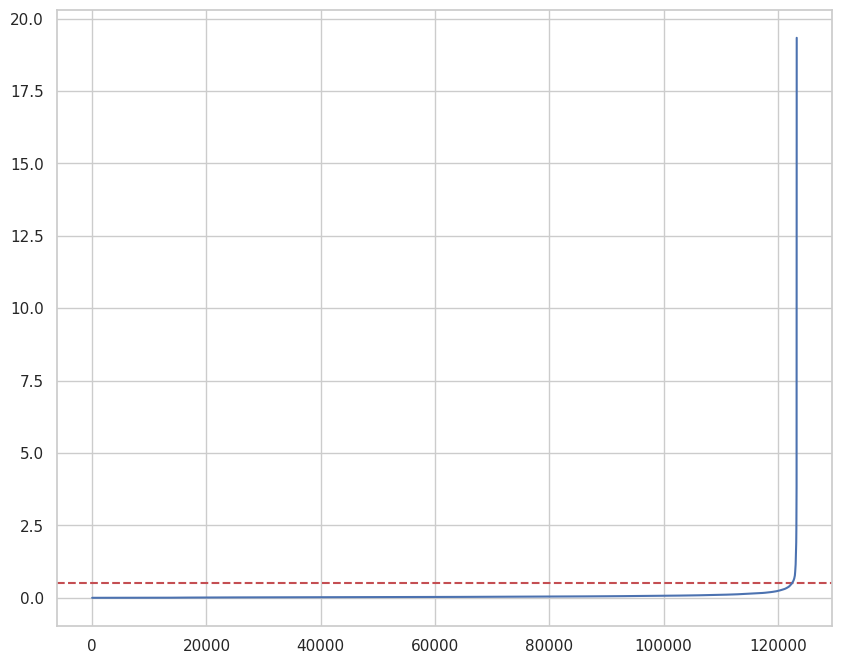

In [22]:
# Generamos la gráfica del método de rodilla para identificar epsilon
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_pca)
distancias, indices = nbrs.kneighbors(X_pca)
distancias = np.sort(distancias.flatten())
fig=plt.figure(figsize=(10,8), dpi= 100, facecolor='w', edgecolor='k')
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.plot(distancias)

In [23]:
# Calculamos el valor de epsilon
i = np.arange(len(distancias))
knee = KneeLocator(i, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')

print(distancias[knee.knee])

0.10679090642499835


<ipython-input-24-b80c2e0a540c>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Text(0.5, 1.0, 'Se encontraron 62 clusteres para epsilon 0.11')

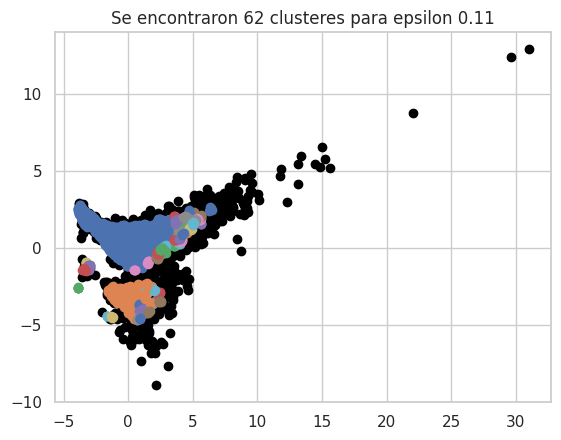

In [24]:
db = DBSCAN(eps = 0.106, min_samples = 4).fit(X_pca)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X_pca).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0],
            y = resultado.loc[resultado.Cluster == k, 1],
            cmap='viridis'
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0],
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, 0.106))

<ipython-input-35-c50a68a6c361>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-35-c50a68a6c361>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-35-c50a68a6c361>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-35-c50a68a6c361>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
<ipython-input-35-c50a68a6c361>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


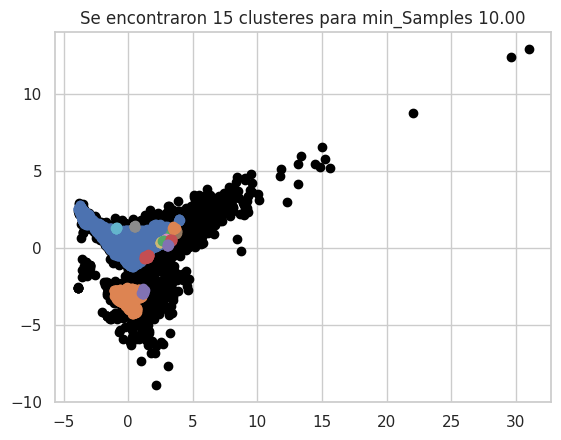

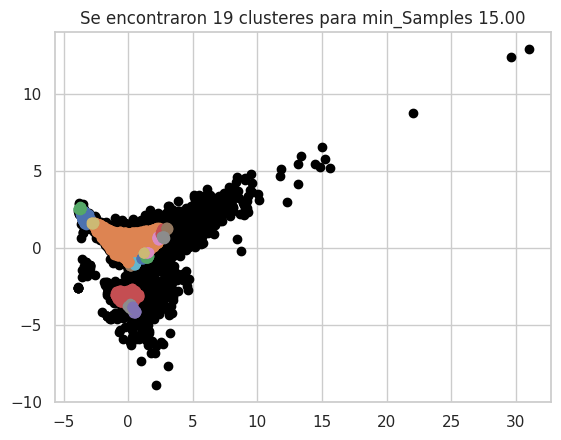

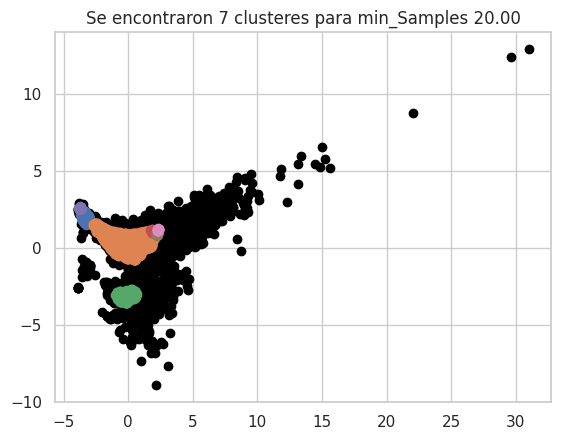

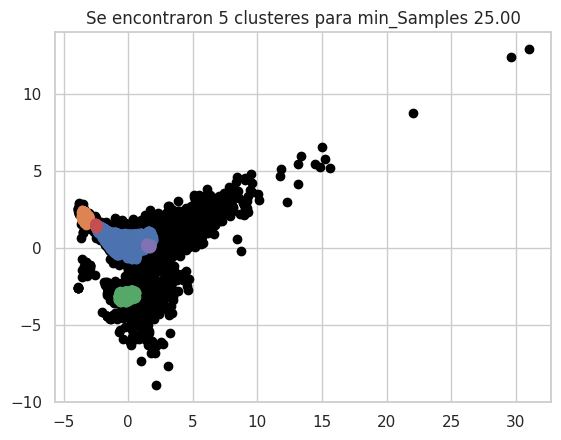

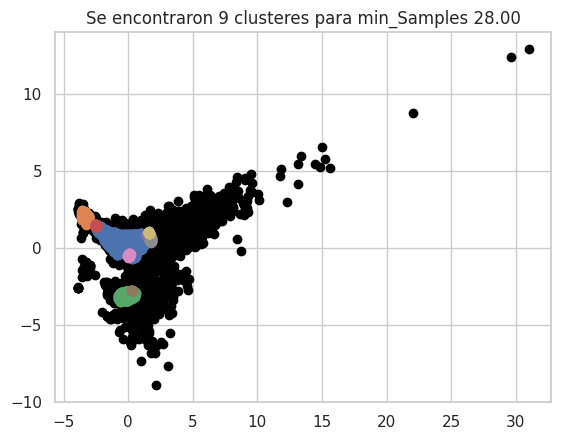

In [35]:
# Iteramos para validar el mejor valor para minsamples

for minpts in [10, 15, 20, 25, 28]:
    db = DBSCAN(eps = 0.106, min_samples = minpts).fit(X_pca)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
    resultado = pd.DataFrame(X_pca).assign(Cluster = clusteres)
    plt.figure()
    for k in np.unique(clusteres):
        if k != -1:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1],
                cmap='viridis'
                )
        else:
            plt.scatter(
                x = resultado.loc[resultado.Cluster == k, 0],
                y = resultado.loc[resultado.Cluster == k, 1],
                c = "black",
                )
    plt.title('Se encontraron %d clusteres para min_Samples %0.2f' % (n_clusteres, minpts))


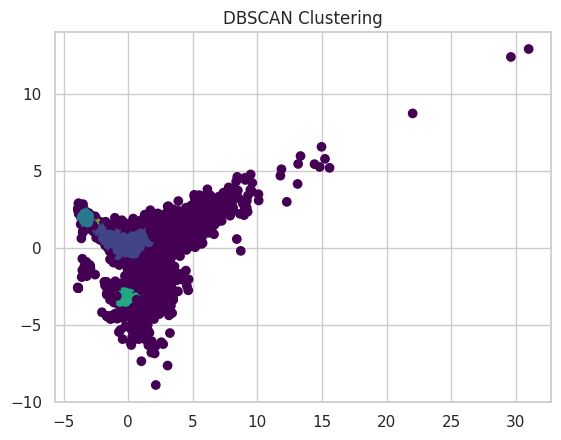

Number of clusters: 6
Cluster sizes: [7273, 597, 788, 46, 71, 0]
Number of noise points: 3555
Silhouette Score: 0.06174605926521891


In [40]:
# Definimos la función cluster_dbscan
def cluster_dbscan(array, eps, min_samples):
    dbsc = DBSCAN(eps=eps, min_samples=min_samples).fit(array)
    dbscan_labels = dbsc.labels_
    core_samples = np.zeros_like(dbscan_labels, dtype=bool)

    if array.shape[1] == 2:
        plt.scatter(array[:, 0], array[:, 1], c=dbscan_labels, cmap='viridis')
        plt.title('DBSCAN Clustering')
        plt.show()

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in labels else 0)
    cluster_sizes = [np.sum(dbscan_labels == i) for i in range(n_clusters)]
    noise_points = array[dbscan_labels == -1]
    silhouette_avg = silhouette_score(array, dbscan_labels)

    return dbsc, dbscan_labels, core_samples, noise_points, n_clusters, cluster_sizes, silhouette_avg

# Definimos los valores de eps y min_samples adecuados
eps = 0.106
min_samples = 25

# Llamamos a la función cluster_dbscan con tus datos escalados y parámetros eps y min_samples adecuados
dbsc, dbscan_labels, core_samples, noise_points, n_clusters, cluster_sizes, silhouette_avg = cluster_dbscan(X_pca, eps, min_samples)

# Imprimimos algunas estadísticas
print(f"Number of clusters: {n_clusters}")
print(f"Cluster sizes: {cluster_sizes}")
print(f"Number of noise points: {len(noise_points)}")
print(f"Silhouette Score: {silhouette_avg}")

## Isolation Forest

Detecta anomalías en lugar de realizar clustering. Se basa en la construcción de un bosque aleatorio. Las anomalías son puntos que requieren menos particionamiento para separarse. Eficaz para detectar valores atípicos en grandes conjuntos de datos. No requiere especificar el número de anomalías de antemano.


In [41]:
# Aplicamos K-Medoids con la matriz de distancias para 3 clusters
Dos_medoides = KMedoids(n_clusters=3, metric='precomputed', random_state=42).fit(distances)

# Obtener las etiquetas de los clusters
cluster_labels = Dos_medoides.labels_

# Crear una lista de tuplas que contengan las etiquetas de los clusters y sus índices o columnas correspondientes
cluster_result = list(zip(range(len(cluster_labels)), cluster_labels))

# Imprimir el resultado
print(cluster_result)

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (35, 0), (36, 0), (37, 0), (38, 0), (39, 0), (40, 2), (41, 0), (42, 0), (43, 0), (44, 0), (45, 0), (46, 0), (47, 0), (48, 0), (49, 0), (50, 0), (51, 0), (52, 0), (53, 0), (54, 0), (55, 0), (56, 0), (57, 2), (58, 0), (59, 0), (60, 0), (61, 0), (62, 2), (63, 0), (64, 0), (65, 0), (66, 2), (67, 0), (68, 0), (69, 0), (70, 0), (71, 0), (72, 0), (73, 0), (74, 0), (75, 0), (76, 2), (77, 0), (78, 0), (79, 0), (80, 0), (81, 0), (82, 0), (83, 0), (84, 0), (85, 0), (86, 0), (87, 0), (88, 0), (89, 0), (90, 0), (91, 0), (92, 0), (93, 1), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 0), (101, 0), (102, 0), (103, 0), (104, 0), (105, 0), (106, 0), (107, 0), (108, 0), (109, 2), (110, 0),

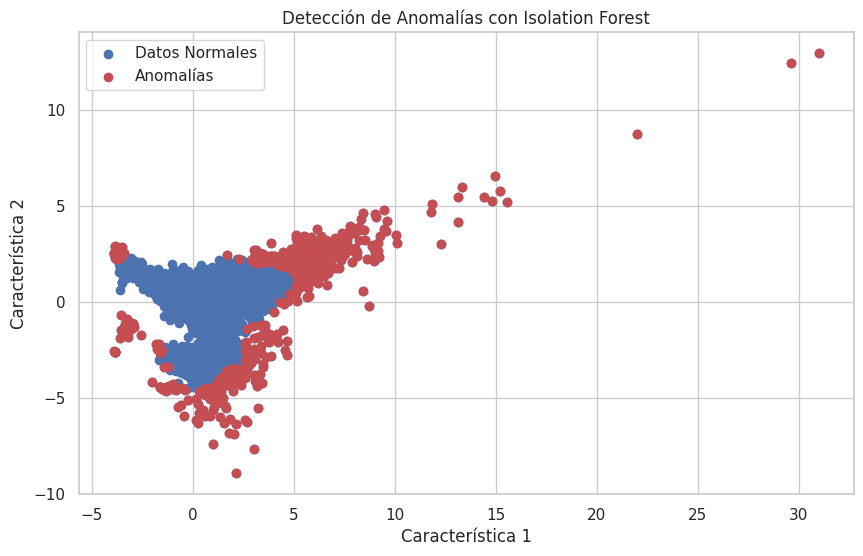

In [42]:
from sklearn.ensemble import IsolationForest

# Entrena el modelo de Isolation Forest
modelo = IsolationForest(contamination=0.05)
modelo.fit(X_pca)

# Predice las anomalías en tus datos
predicciones = modelo.predict(X_pca)

# Las instancias con valor -1 en 'predicciones' son consideradas anomalías
anomalias = X_pca[predicciones == -1]

# Crea una gráfica de dispersión para visualizar los datos y las anomalías
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', label='Datos Normales')
plt.scatter(anomalias[:, 0], anomalias[:, 1], c='r', label='Anomalías')
plt.title('Detección de Anomalías con Isolation Forest')
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

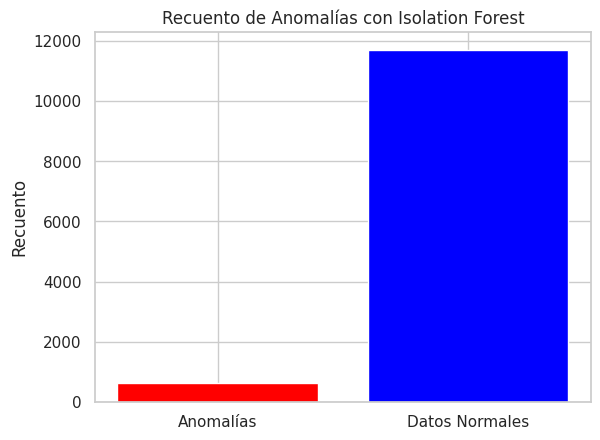

Recuento total de anomalías: 617


In [43]:
# Calcula el recuento de anomalías
num_anomalias = np.sum(predicciones == -1)

# Crea una gráfica de barras para mostrar el recuento de anomalías
plt.bar(['Anomalías', 'Datos Normales'], [num_anomalias, len(X_pca) - num_anomalias], color=['red', 'blue'])
plt.title('Recuento de Anomalías con Isolation Forest')
plt.ylabel('Recuento')
plt.show()

print(f"Recuento total de anomalías: {num_anomalias}")


Al utilizar el modelo Isolation Forest en el conjunto de datos y comparando el resultado con el campo "Revenue", podemos obtener una distribución similar en el sentido de que las "anomalías" y "datos normales" por Isolation Forest parecen estar relacionadas con los valores del campo "Revenue."

El algoritmo identifica anomalías considerando la idea de que los datos normales son más comunes y, por lo tanto, se requiere menos particionamiento para aislarlos en un bosque aleatorio. En otras palabras, las anomalías son puntos que requieren menos divisiones (menos profundidad en el árbol) para separarse del resto de los datos.

Cuando observamos la gráfica de dispersión, notamos que las anomalías detectadas por Isolation Forest, resaltadas en rojo, tienden a estar asociadas con 0 en "Revenue". Esta implementación podría se de ayuda en la identificación de clientes cuyas características puedan están asociadas a la efectividad  de servicios en la empresa.

En resumen, Isolation Forest, junto con la visualización de la gráfica de dispersión, nos proporciona una herramienta para identificar y comprender cómo ciertos valores "atípicos" están asociados a la posibilidad de compra "Revenue".

